In [1]:
# Usaremos las siguientes bibliotecas
# Datos
import numpy as np 
import pandas as pd 

# Viz
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import metrics
from sklearn.metrics import confusion_matrix, accuracy_score

import warnings
warnings.filterwarnings('ignore')

# Univariada

In [2]:
# Semilla aletoria
np.random.seed(1)
mu = 10
sigma = 2
clase1 = np.random.normal(mu, sigma,1000);

mu = 16
sigma = 2

clase2 = np.random.normal(mu, sigma,1000);

np.max(clase2)

22.865326863591118

<AxesSubplot:>

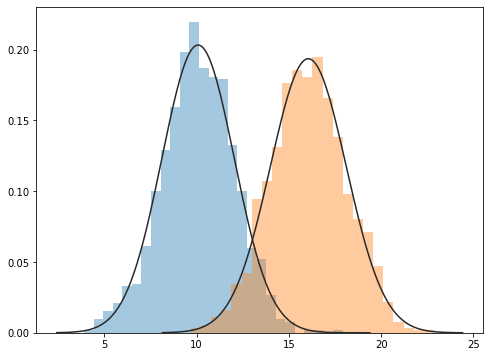

In [3]:
from scipy.stats import norm

plt.figure(figsize=(8,6))
sns.distplot(clase1, fit=norm ,kde=False)
sns.distplot(clase2, fit=norm ,kde=False)

In [4]:
#Hago la curva ROC - Para todos los valores de umbral entre el minimo el minimo y el máximo valor la relación entre
#


clase1CC = np.vstack((clase1, np.ones(1000)))
clase2CC = np.vstack((clase2, np.zeros(1000)))


data = np.vstack((clase1CC.T, clase2CC.T))
print(data.shape)

print(data[0:10])

data = data[np.argsort(data[:, 0])]

(2000, 2)
[[13.24869073  1.        ]
 [ 8.77648717  1.        ]
 [ 8.9436565   1.        ]
 [ 7.85406276  1.        ]
 [11.73081526  1.        ]
 [ 5.39692261  1.        ]
 [13.48962353  1.        ]
 [ 8.4775862   1.        ]
 [10.63807819  1.        ]
 [ 9.50125925  1.        ]]


In [5]:
#TPR (eje Y) -- FPR (eje x)
roc = np.zeros([ data.shape[0], 3])
for i in range(data.shape[0] ):
    roc[i, 1] = np.count_nonzero(data[0:i, 1] == 1)/len(clase1CC[0]) ##true positive
    roc[i, 0] = np.count_nonzero(data[0:i, 1] == 0)/len(clase2CC[0]) ##false positive
    roc[i, 2] = data[i, 0] #umbral

In [6]:
roc.shape

(2000, 3)

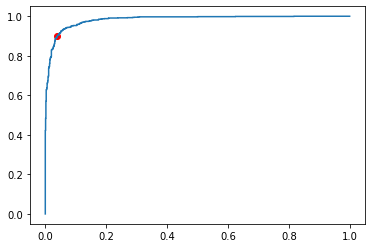

punto de decision 12.46111639990945


In [7]:
plt.plot(roc[:, 0], roc[:, 1])

i = 940
plt.scatter( roc[i, 0], roc[i, 1], color='red',label='Punto de decision' )
plt.show()
print('punto de decision ' +  str(roc[i, 2]) )
umbral = roc[i, 2]

** Con ese punto de decisión calculo la matriz de confusion**

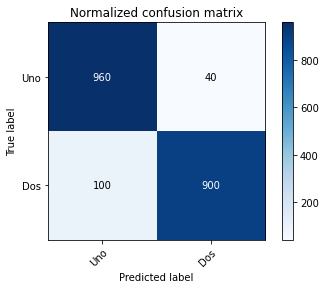

In [10]:
class_pred = np.zeros(2000)
class_pred[ data[:,0]  < umbral ] = 1  



class_names = ["Uno", "Dos"]
plot_confusion_matrix(data[:,1], class_pred, classes=class_names, normalize=False,
                      title='Normalized confusion matrix')

plt.show()

In [11]:
#Calculo de Parametros exactitud, precisión, f-measure teniendo en cuenta que queremos detectar clase Uno.
cm = confusion_matrix(data[:,1], class_pred)

tp = cm[0,0]  
tn = cm[1,1]
fp = cm[0,1]
fn = cm[1,0]

total = tp + tn + fp + fn

exactitud = (tp + tn) / total
precision = tp / (tp + fp)
recall = tp / (tp + fn)
f_measure = (2*precision*recall) / (precision + recall)

print( "Metricas obtenidas: \nExactitud = %.2f" % exactitud )
print( "Precision = %.2f" % precision)
print("f-measure = %.2f"  % f_measure )

Metricas obtenidas: 
Exactitud = 0.93
Precision = 0.96
f-measure = 0.93


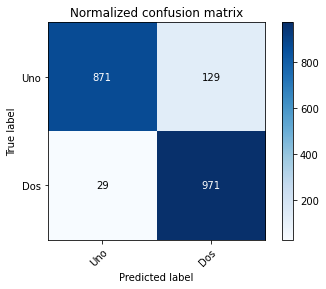

Metricas obtenidas: 
Exactitud = 0.92
Precision = 0.87
f-measure = 0.92


In [12]:
#Muevo el umbral para tener menos falsos negativos
umbral = roc[1100, 2]

class_pred = np.zeros(2000)
class_pred[ data[:,0]  < umbral ] = 1  



class_names = ["Uno", "Dos"]
plot_confusion_matrix(data[:,1], class_pred, classes=class_names, normalize=False,
                      title='Normalized confusion matrix')

plt.show()



cm = confusion_matrix(data[:,1], class_pred)

tp = cm[0,0]  
tn = cm[1,1]
fp = cm[0,1]
fn = cm[1,0]

total = tp + tn + fp + fn

exactitud = (tp + tn) / total
precision = tp / (tp + fp)
recall = tp / (tp + fn)
f_measure = (2*precision*recall) / (precision + recall)

print( "Metricas obtenidas: \nExactitud = %.2f" % exactitud )
print( "Precision = %.2f" % precision)
print("f-measure = %.2f"  % f_measure )

<AxesSubplot:>

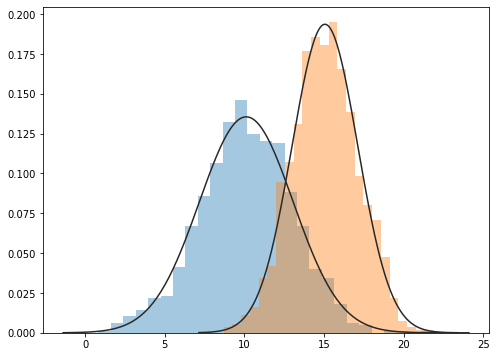

In [13]:
#Ahora junto las clases
# Semilla aletoria
np.random.seed(1)
mu = 10
sigma = 3
clase1 = np.random.normal(mu, sigma,1000);

mu = 15
sigma = 2

clase2 = np.random.normal(mu, sigma,1000);
plt.figure(figsize=(8,6))
sns.distplot(clase1, fit=norm ,kde=False)
sns.distplot(clase2, fit=norm ,kde=False)

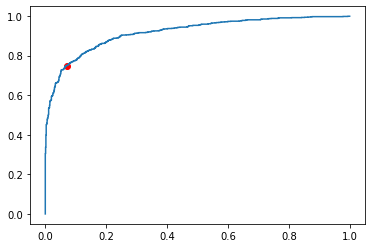

punto de decision 12.131938542095831


In [14]:
#Hago la curva ROC
clase1CC = np.vstack((clase1, np.ones(1000)))
clase2CC = np.vstack((clase2, np.zeros(1000)))
data = np.vstack((clase1CC.T, clase2CC.T))

data = data[np.argsort(data[:, 0])]

roc = np.zeros([ data.shape[0], 3])
for i in range(data.shape[0] ):
    roc[i, 1] = np.count_nonzero(data[0:i, 1] == 1)/len(clase1CC[0]) ##true positive
    roc[i, 0] = np.count_nonzero(data[0:i, 1] == 0)/len(clase2CC[0]) ##false positive
    roc[i, 2] = data[i, 0] #umbral
    
plt.plot(roc[:, 0], roc[:, 1])

i = 820
plt.scatter( roc[i, 0], roc[i, 1], color='red',label='Punto de decision' )
plt.show()
print('punto de decision ' +  str(roc[i, 2]) )
umbral = roc[i, 2]

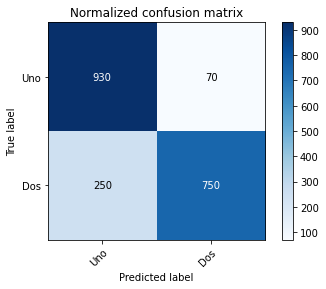

Metricas obtenidas: 
Exactitud = 0.84
Precision = 0.93
f-measure = 0.85


In [15]:
#Calculo métricas
umbral = roc[i, 2]

class_pred = np.zeros(2000)
class_pred[ data[:,0]  < umbral ] = 1  



class_names = ["Uno", "Dos"]
plot_confusion_matrix(data[:,1], class_pred, classes=class_names, normalize=False,
                      title='Normalized confusion matrix')

plt.show()



cm = confusion_matrix(data[:,1], class_pred)

tp = cm[0,0]  
tn = cm[1,1]
fp = cm[0,1]
fn = cm[1,0]

total = tp + tn + fp + fn

exactitud = (tp + tn) / total
precision = tp / (tp + fp)
recall = tp / (tp + fn)
f_measure = (2*precision*recall) / (precision + recall)

print( "Metricas obtenidas: \nExactitud = %.2f" % exactitud )
print( "Precision = %.2f" % precision)
print("f-measure = %.2f"  % f_measure )

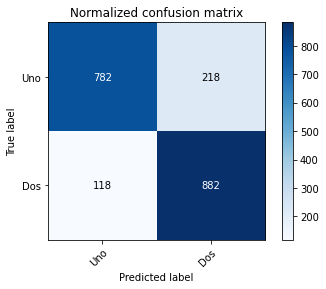

Metricas obtenidas: 
Exactitud = 0.83
Precision = 0.78
f-measure = 0.82


In [16]:
#Calculo métricas
umbral = roc[1100, 2]

class_pred = np.zeros(2000)
class_pred[ data[:,0]  < umbral ] = 1  



class_names = ["Uno", "Dos"]
plot_confusion_matrix(data[:,1], class_pred, classes=class_names, normalize=False,
                      title='Normalized confusion matrix')

plt.show()



cm = confusion_matrix(data[:,1], class_pred)

tp = cm[0,0]  
tn = cm[1,1]
fp = cm[0,1]
fn = cm[1,0]

total = tp + tn + fp + fn

exactitud = (tp + tn) / total
precision = tp / (tp + fp)
recall = tp / (tp + fn)
f_measure = (2*precision*recall) / (precision + recall)

print( "Metricas obtenidas: \nExactitud = %.2f" % exactitud )
print( "Precision = %.2f" % precision)
print("f-measure = %.2f"  % f_measure )

In [17]:
def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        #print("Normalized confusion matrix")
    #else:
        #print('Confusion matrix, without normalization')

    #print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    #fig.tight_layout()
    #plt.xlim(-0.5, len(np.unique(y))-0.5)
    #plt.ylim(len(np.unique(y))-0.5, -0.5)
    return ax

# Multivariado

In [18]:
#from scipy.stats import multivariate_normal
from numpy.random import multivariate_normal

size1 = 250
mu1 = [2, 1]
cov1 = [[1, 0.7],[0.7, 1]]

size2 = 200
mu2 = [1, 3]
cov2 = [[1, 0.5],[0.5, 1]]

# Sample classes
xc1 = multivariate_normal(mean=mu1, cov=cov1, size=size1).T

xc2 = multivariate_normal(mean=mu2, cov=cov2, size=size2).T

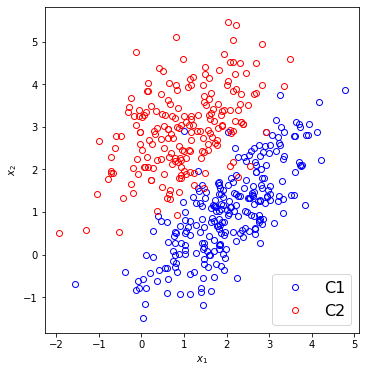

In [19]:
# Veamos cómo se ven
fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(111)

ax.plot(*xc1, 'ob', mfc='None', label='C1')
ax.plot(*xc2, 'or', mfc='None', label='C2')

ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$')
ax.legend(loc='lower right', fontsize=16)
ax.set_aspect('equal')

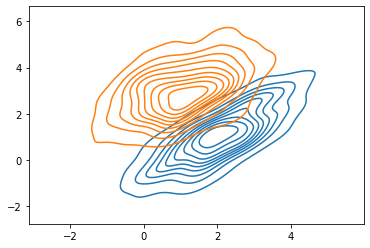

In [20]:
sns.kdeplot(xc1[0],xc1[1], shade=False);
sns.kdeplot(xc2[0],xc2[1], shade=False);

** Para poder realizar la curva ROC necesito crear algun método de separación de las clases. Por ejemplo podría definir y una recta y que la probabilidad de pertenecer a una clase esté dada por la inversa de la distancia a la recta. A partir de ahí definir los verdaderos positivos y los falsos positivos para distintos valores de probabilidad. Seguro hay mucho métodos más para hacer una separación **